# Predict students' graduation rate

dataset 
- [from @ roycekimmons.com](http://roycekimmons.com/tools/generated_data/graduation_rate)

> This is a fictional dataset and should only be used for data science training purposes.
> 
> This data set includes graduation rates from a four-year college with a variety of student factors.

The key questions we want to address:

> 1. How effective are entrance requirements at predicting gpa and graduation rate?
> 1. What would be the best way to improve graduation rates?

> All data sets are generated on-the-fly. So, you can increase your n by downloading a data set multiple times and combining the files. (n=1000) per large sample download

Based on the above statement, I have downloaded 5x times and combined them into one csv file so that we can work with a larger sample size of 5000 observations, instead of just 1000 observations.

Target is `graduate_in_4years` 
- feature-engineered from 'years_to_graduate' as 
  - 0: 'Yes' ie 'years_to_graduate' < 5
  - 1: 'No' ie 'years_to_graduate' > 4 
- was set to 4 years initially until EDA reveals median is 5.


In [1]:
%reload_ext autoreload
%autoreload 2

%reload_ext dotenv
%dotenv

import sys
from pathlib import Path

# Set the path to the current file 
current_file_path = Path().resolve()
print(f'{current_file_path = } ')

# Set the path to the data folder
data_folder_path = current_file_path / 'data'
print(f'{data_folder_path = } ')

# Set the path to the src folder
src_folder_path = current_file_path / 'src'
print(f'{src_folder_path = } ')

# Add the src folder to the system path
sys.path.append(str(src_folder_path))

# Import modules from files under /src
from config import * 
from src.data_loader import CSVDataLoader
from src.data_preprocessor import Preprocessor
from src.data_feature_builder import FeatureBuilder
from src.trainer import Trainer


current_file_path = WindowsPath('B:/repos/Courses/DataTalksClub/mlzoomcamp-midterms') 
data_folder_path = WindowsPath('B:/repos/Courses/DataTalksClub/mlzoomcamp-midterms/data') 
src_folder_path = WindowsPath('B:/repos/Courses/DataTalksClub/mlzoomcamp-midterms/src') 


## Import packages

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt

import seaborn as sns
from pprint import pprint

import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score

### Domain area research

The SAT and ACT are standardized tests widely used for college admissions in the United States.

ACT: The average of a student's scores on the four ACT tests: English, mathematics, reading, and science. The score range for each of the four tests is 1-36. The composite score is reported as a whole number from 1 to 36, and is rounded to the nearest whole number.  

SAT : The SAT total score is the sum of the two section scores, Evidence-Based Reading and Writing, and Math. Each section is scored on a scale of 200 to 800, so the total score can range from 400 to 1600. 

GPA : answer from google bard to the question 'What is a passing GPA?'

> A passing GPA is the minimum GPA that a student must maintain in order to remain in good standing and graduate from college. The passing GPA varies from school to school, but it is typically between 2.0 and 2.5.
> 
> Some schools may have higher passing GPAs for certain programs or majors. For example, a student in an engineering program may need to maintain a GPA of at least 3.0 in order to graduate.
> 
> Students who fall below the passing GPA may be placed on academic probation. If they do not improve their grades, they may be suspended or expelled from school.
> 
> It is important to note that a passing GPA is not the same as a good GPA. Many colleges and universities use GPAs to determine admissions decisions, scholarships, and honors programs. A student who wants to be competitive in the college admissions process should aim for a GPA of at least 3.0.

### Data Dictionary

| **Column Name**       | **Description**                               | **Range** | **Data Type** |
|-----------------------|-----------------------------------------------|-----------|---------------|
| 'act_composite_score' | The average of English, Mathematics, Reading, and Science tests. (Numerical) | 1-36 | int |
| 'sat_total_score'     | Sum of Reading & Writing, and Mathematics. (Numerical) | 400 to 1600 | int |
| 'parental_level_of_education' |  For one parent. (Categorical)   | | |
| 'parental_income' | Income for one parent, per annum. (Numerical) | | int |
| 'high_school_gpa' | Grade point average upon graduating high school. (Numerical) | 2.0 to 4.0 | float |
| 'college_gpa' | Grade point average upon graduating college. (Numerical) | 2.0 to 4.0| float |
| 'years_to_graduate' | `target` Number of years to graduate college. (Numerical) | | int  |

## Ingest Data

In [4]:
file = 'graduation_rate.csv'
CSVDataLoader().combine_files(data_folder_path)
data = CSVDataLoader().load(data_folder_path / file)

graduation*.csv
['graduation_rate.csv', 'graduation_rate_0.csv', 'graduation_rate_1.csv', 'graduation_rate_2.csv', 'graduation_rate_3.csv', 'graduation_rate_4.csv']
reading graduation_rate.csv ... 
Loading CSV data...


100%|██████████| 10/10 [00:00<00:00, 222.21it/s]


Finished processing the CSV file.
df.shape = (5000, 7)

reading graduation_rate_0.csv ... 
Loading CSV data...


100%|██████████| 2/2 [00:00<00:00, 399.97it/s]


Finished processing the CSV file.
df.shape = (1000, 7)

reading graduation_rate_1.csv ... 
Loading CSV data...


100%|██████████| 2/2 [00:00<00:00, 400.01it/s]


Finished processing the CSV file.
df.shape = (1000, 7)

reading graduation_rate_2.csv ... 
Loading CSV data...


100%|██████████| 2/2 [00:00<00:00, 399.97it/s]


Finished processing the CSV file.
df.shape = (1000, 7)

reading graduation_rate_3.csv ... 
Loading CSV data...


100%|██████████| 2/2 [00:00<00:00, 500.30it/s]


Finished processing the CSV file.
df.shape = (1000, 7)

reading graduation_rate_4.csv ... 
Loading CSV data...


100%|██████████| 2/2 [00:00<00:00, 399.95it/s]


Finished processing the CSV file.
df.shape = (1000, 7)

data.shape = (10000, 7)
B:\repos\Courses\DataTalksClub\mlzoomcamp-midterms\data\graduation_rate.csv
B:\repos\Courses\DataTalksClub\mlzoomcamp-midterms\data\graduation_rate.csv exists, not overwritten.
Loading CSV data...


100%|██████████| 10/10 [00:00<00:00, 277.77it/s]

Finished processing the CSV file.
df.shape = (5000, 7)


### column names

In [5]:
data.columns

Index(['ACT composite score', 'SAT total score', 'parental level of education',
       'parental income', 'high school gpa', 'college gpa',
       'years to graduate'],
      dtype='object')

Column names contain symbols and spaces, so we are going to tidy these up.

In [6]:
data = Preprocessor().ColumnsSymbolReplacer(data)

  -- Replacing symbols in column names...


In [7]:
data = Preprocessor().SymbolReplacer(data, 'parental_level_of_education')

  -- Replacing symbols in data...


In [8]:
data.head(2).T

,0,1
act_composite_score,30,31
sat_total_score,2082,2145
parental_level_of_education,associates degree,associates degree
parental_income,82014,59761
high_school_gpa,4.0,4.0
college_gpa,3.2,3.3
years_to_graduate,5,5


In [9]:
data.columns

Index(['act_composite_score', 'sat_total_score', 'parental_level_of_education',
       'parental_income', 'high_school_gpa', 'college_gpa',
       'years_to_graduate'],
      dtype='object')

In [10]:
numericals = data.select_dtypes(include=['int64','float64'])
categoricals = data.select_dtypes(exclude=['int64','float64'])
print(f'{numericals.columns = } ')
print(f'{categoricals.columns = } ')

numericals.columns = Index(['act_composite_score', 'sat_total_score', 'parental_income',
       'high_school_gpa', 'college_gpa', 'years_to_graduate'],
      dtype='object') 
categoricals.columns = Index(['parental_level_of_education'], dtype='object') 


## Data descriptive analysis



In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   act_composite_score          5000 non-null   int64  
 1   sat_total_score              5000 non-null   int64  
 2   parental_level_of_education  5000 non-null   object 
 3   parental_income              5000 non-null   int64  
 4   high_school_gpa              5000 non-null   float64
 5   college_gpa                  5000 non-null   float64
 6   years_to_graduate            5000 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 273.6+ KB


### duplicated records

In [12]:
data.duplicated().any()

False

### missing data

In [13]:
data.isnull().sum()

act_composite_score            0
sat_total_score                0
parental_level_of_education    0
parental_income                0
high_school_gpa                0
college_gpa                    0
years_to_graduate              0
dtype: int64

Insights on *duplicated* and *missing data*:

- there are no duplicated records
- there are no missing data

So, we can proceed.


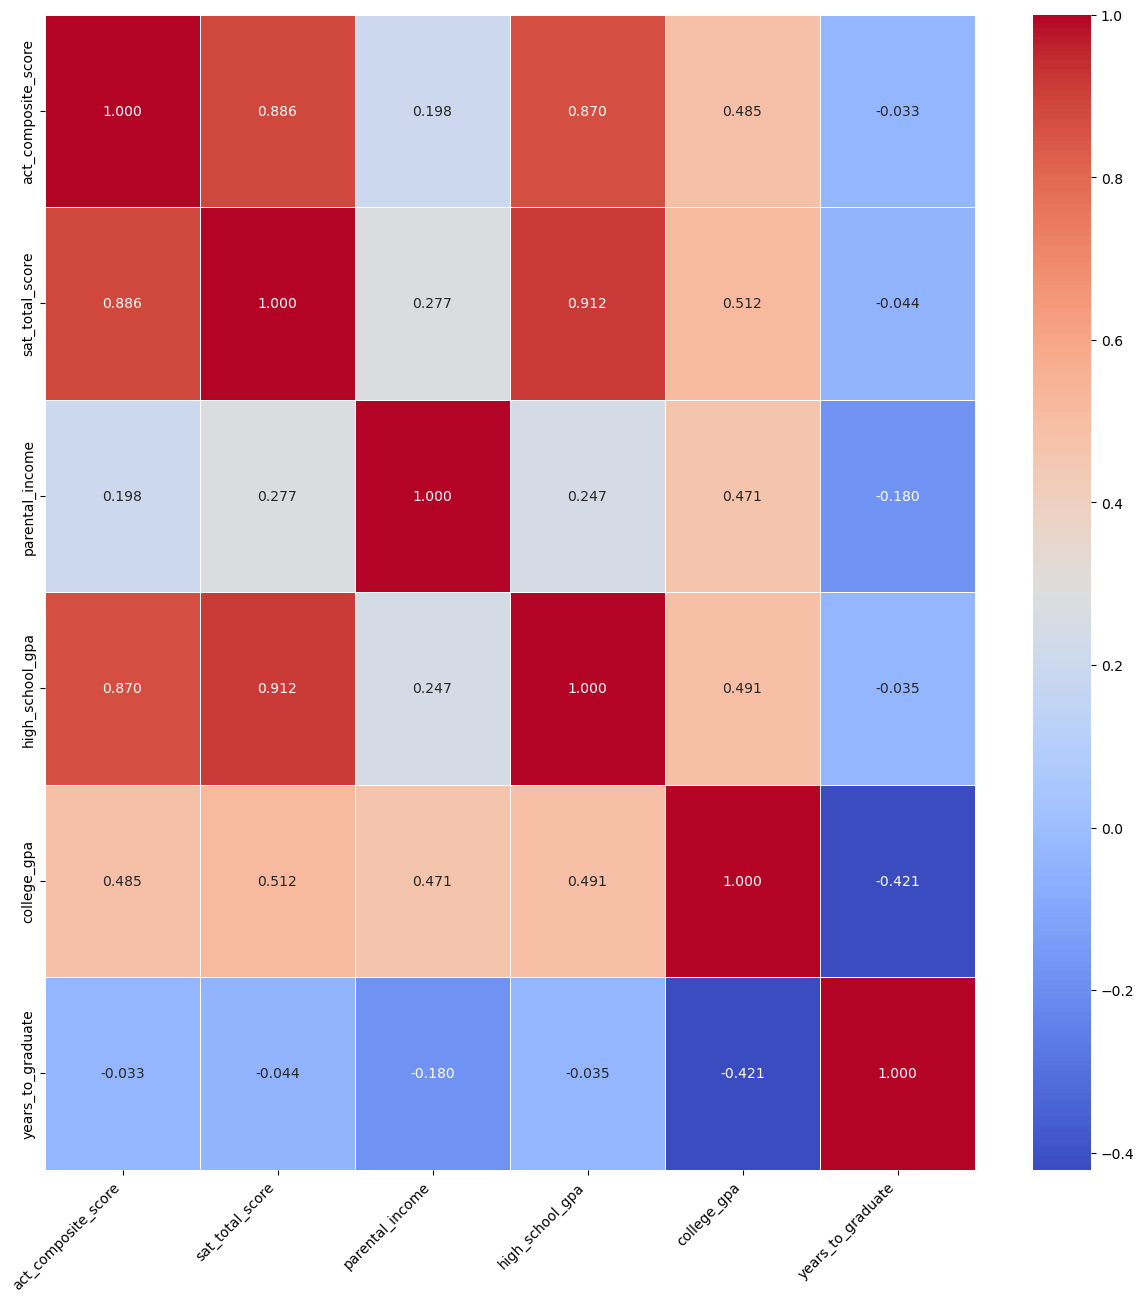

In [14]:
corr = data.corr()
"""colormap so (coolwarm or Spectral)
- intense blues are highly negative and 
- intense reds are highly positive
"""
plt.figure(figsize=(15,15))
colormap = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(corr, annot=True, cbar=True, linewidths=0.5, cmap=colormap, fmt=".3f",)
plt.xticks(rotation=45, horizontalalignment='right') 
plt.yticks(rotation=90, horizontalalignment='right') 
plt.show()

## Exploratory Data Analysis

### Analysing Target

Before we look at the data and charts, it is imperative that we do not take a peek at the holdout-set as our mind is a master as seeing patterns. So, it is always a good idea to to the split before we perform any EDA.

In [15]:
data.years_to_graduate.describe()

count    5000.000000
mean        4.988000
std         1.392926
min         3.000000
25%         4.000000
50%         5.000000
75%         6.000000
max        10.000000
Name: years_to_graduate, dtype: float64

In [16]:
data[COLS_CATEGORICAL] = data[COLS_CATEGORICAL].astype('category')

In [17]:
graduate_threshold = 6
# create a new column called 'target' that is set to Yes/1 if years_to_graduate is below the graduate_threshold
data['target'] = [1 if years < graduate_threshold else 0 for years in data['years_to_graduate']]

In [18]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [19]:
target_grpby = df_full_train.groupby(['years_to_graduate']).count()
target_grpby

,act_composite_score,sat_total_score,parental_level_of_education,parental_income,high_school_gpa,college_gpa,target
years_to_graduate,,,,,,,
3,372,372,372,372,372,372,372
4,1361,1361,1361,1361,1361,1361,1361
5,1115,1115,1115,1115,1115,1115,1115
6,551,551,551,551,551,551,551
7,340,340,340,340,340,340,340
8,183,183,183,183,183,183,183
9,66,66,66,66,66,66,66
10,12,12,12,12,12,12,12


In [20]:
df_full_train['target'].mean()

0.712

In [21]:
df_full_train['target'].value_counts()

1    2848
0    1152
Name: target, dtype: int64

In [22]:
df_full_train['target'] = df_full_train['target'].astype('category')

Slightly an imbalanced dataset, but it is not too extreme.

### Target: pie chart

In [23]:
# df = pd.read_csv("covid-19-states-daily.csv")
# df['dateChecked'] = pd.to_datetime(df['dateChecked'])
# df = df[df['dateChecked'].dt.date.astype(str) == '2020-03-17']
# df = df[df['death']>=5]
# print (df)

# pie_chart = px.pie(
#         data_frame=df,
#         values='death',
#         names='state',
#         color='state',                      #differentiate markers (discrete) by color
#         color_discrete_sequence=["red","green","blue","orange"],     #set marker colors
#         # color_discrete_map={"WA":"yellow","CA":"red","NY":"black","FL":"brown"},
#         hover_name='negative',              #values appear in bold in the hover tooltip
#         # hover_data=['positive'],            #values appear as extra data in the hover tooltip
#         # custom_data=['total'],              #values are extra data to be used in Dash callbacks
#         labels={"state":"the State"},       #map the labels
#         title='Coronavirus in the USA',     #figure title
#         template='presentation',            #'ggplot2', 'seaborn', 'simple_white', 'plotly',
#                                             #'plotly_white', 'plotly_dark', 'presentation',
#                                             #'xgridoff', 'ygridoff', 'gridon', 'none'
#         width=800,                          #figure width in pixels
#         height=600,                         #figure height in pixels
#         hole=0.5,                           #represents the hole in middle of pie
#         )

# # pie_chart.update_traces(textposition='outside', textinfo='percent+label',
# #                         marker=dict(line=dict(color='#000000', width=4)),
# #                         pull=[0, 0, 0.2, 0], opacity=0.7, rotation=180)



# pio.show(pie_chart)

In [24]:

fig = px.pie(
    df_full_train, 
    values=df_full_train.target.value_counts(), 
    names=TARGET_LABELS, 
    hole=.3, 
    title='Breakdown of target as percentage of the whole',
    width=800,   #figure width in pixels
    height=600, 
)
fig.show()

In [25]:
df_full_train.parental_level_of_education.nunique()

6

In [26]:
df_full_train.parental_level_of_education.value_counts()

some college         938
high school          810
associates degree    803
some high school     682
bachelors degree     506
masters degree       261
Name: parental_level_of_education, dtype: int64

In [27]:
df_full_train.iloc[734]

act_composite_score                           28
sat_total_score                             1996
parental_level_of_education    associates degree
parental_income                            76791
high_school_gpa                              3.6
college_gpa                                  3.4
years_to_graduate                              4
target                                         1
Name: 2020, dtype: object

In [28]:
# del numericals['years_to_graduate']

In [29]:
numericals.columns

Index(['act_composite_score', 'sat_total_score', 'parental_income',
       'high_school_gpa', 'college_gpa', 'years_to_graduate'],
      dtype='object')

### Correlation

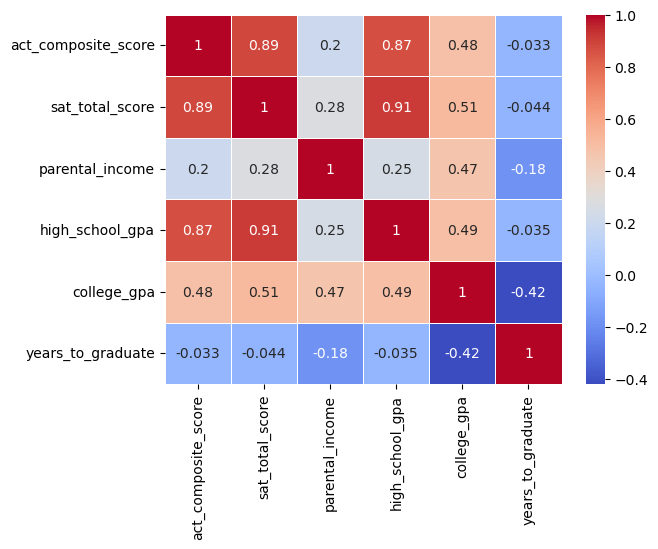

In [30]:
corr = numericals.corr()
"""colormap so (coolwarm or Spectral)
- intense blues are highly negative and 
- intense reds are highly positive
"""
colormap = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(corr, annot=True, cbar=True, linewidths=0.5, cmap=colormap);

### Mutual Information

In [31]:
def mutual_info_target(series):
    return mutual_info_score(series, df_full_train.target)

In [32]:
mi = df_full_train.apply(mutual_info_target)
mi.sort_values(ascending=False)

years_to_graduate              0.600351
target                         0.600351
parental_income                0.588568
sat_total_score                0.094508
college_gpa                    0.042517
act_composite_score            0.002750
parental_level_of_education    0.002435
high_school_gpa                0.001579
dtype: float64

### Feature Importances

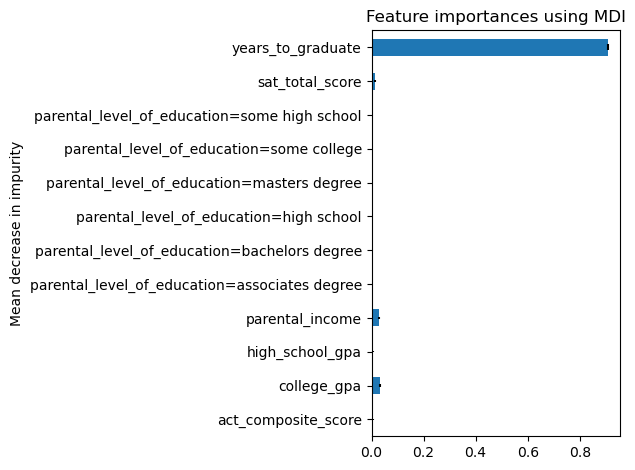

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer

y_train = df_train.target.values
train_dicts = df_train.drop(['target'], axis=1).to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
feature_names = dv.feature_names_
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.barh(yerr=std, ax=ax) #yerr=std,
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### Final features set

Based on the correlation, mutual information and feature importances analysis above, which all seems to corroborate each other, only these 3 features will be considered for the hyperparameter tuning stage. So that the training can be sped up.

- parental_income
- sat_total_score
- college_gpa  

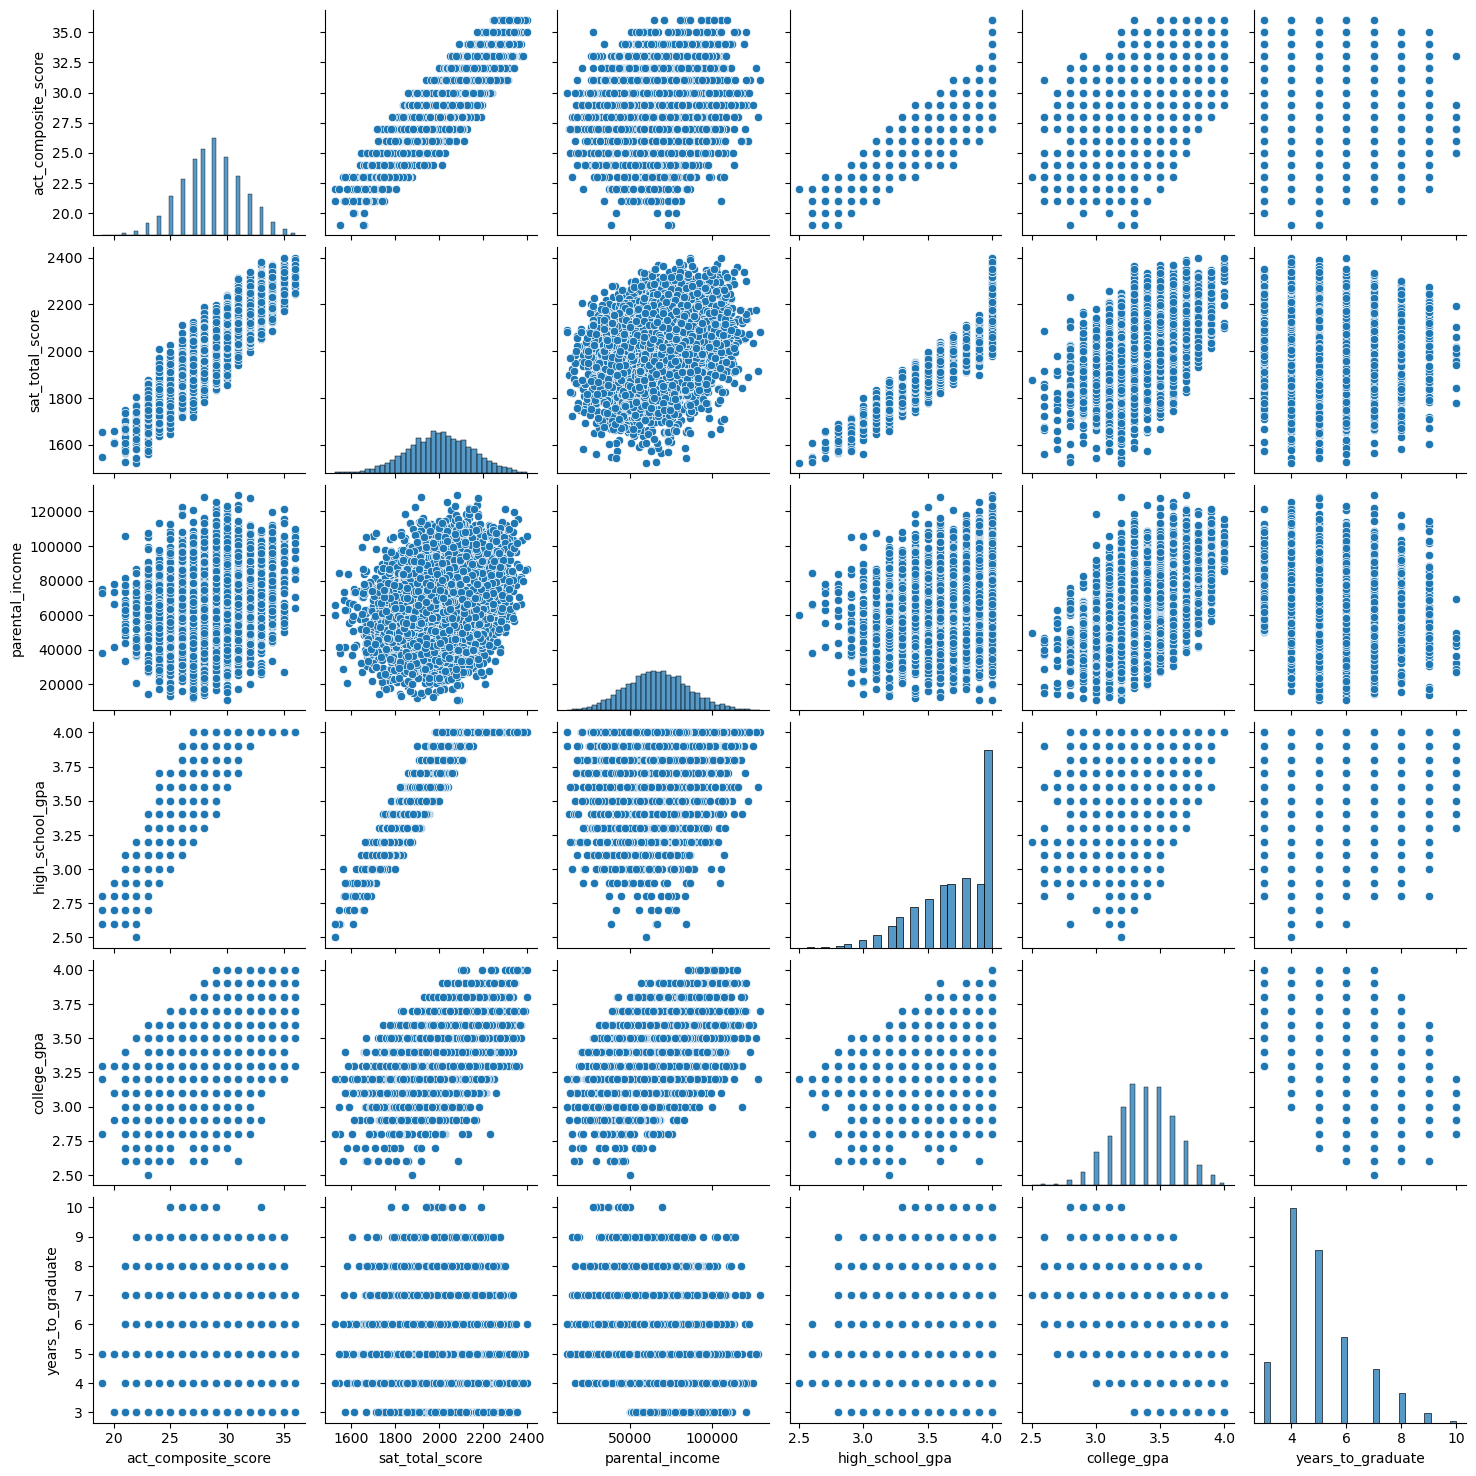

In [34]:
sns.pairplot(numericals);

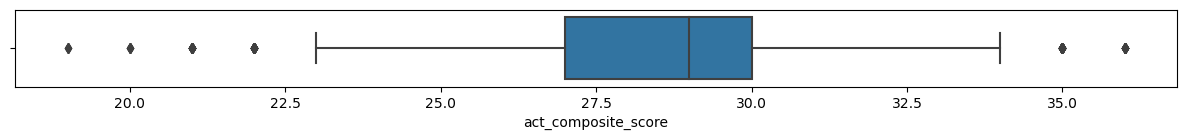

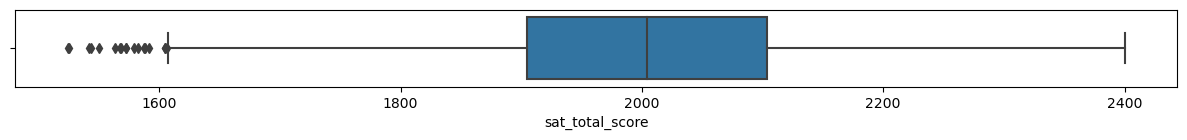

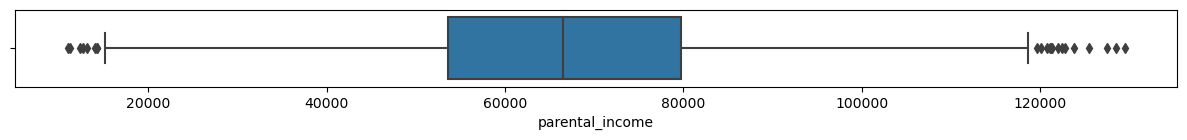

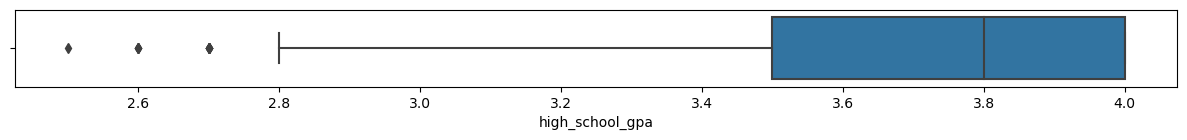

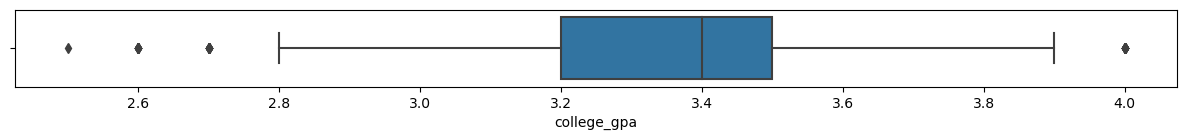

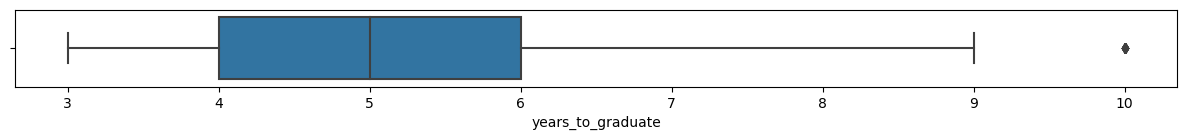

In [35]:
for column in numericals.columns.to_list():
    plt.figure(figsize=(15,1))
    sns.boxplot(data=numericals, x=column)

plt.show()


Insights: some outliers we need to treat with setting all outliers to the median values.

In [36]:
numericals = Preprocessor().OutliersTransformer(numericals)

  -- Transforming outliers...


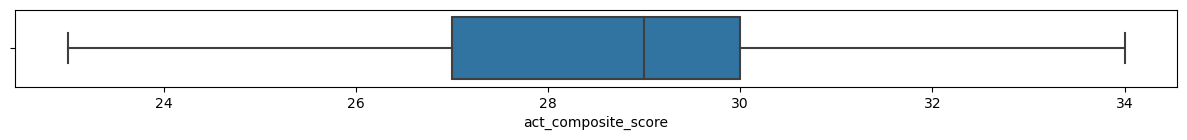

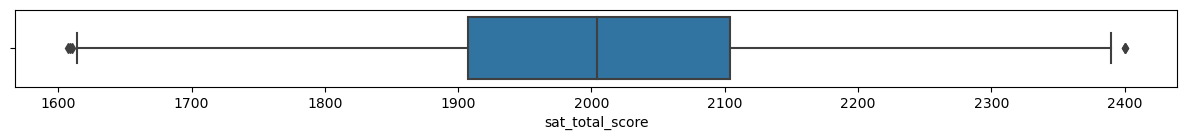

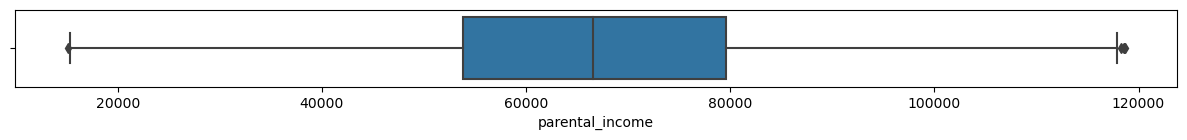

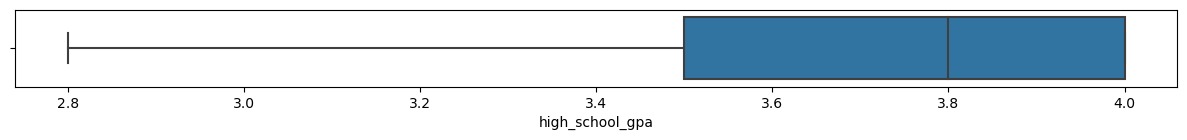

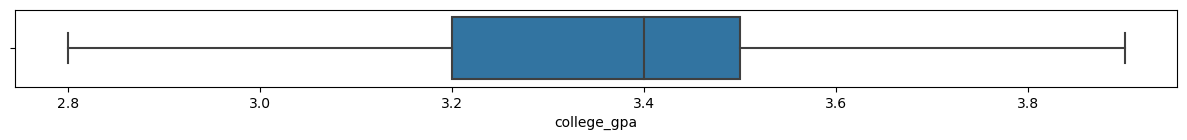

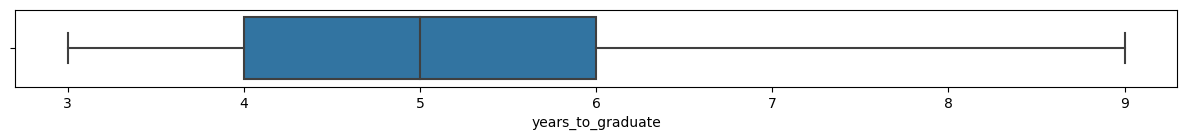

In [37]:
for column in numericals.columns.to_list():
    plt.figure(figsize=(15,1))
    sns.boxplot(data=numericals, x=column)

plt.show()

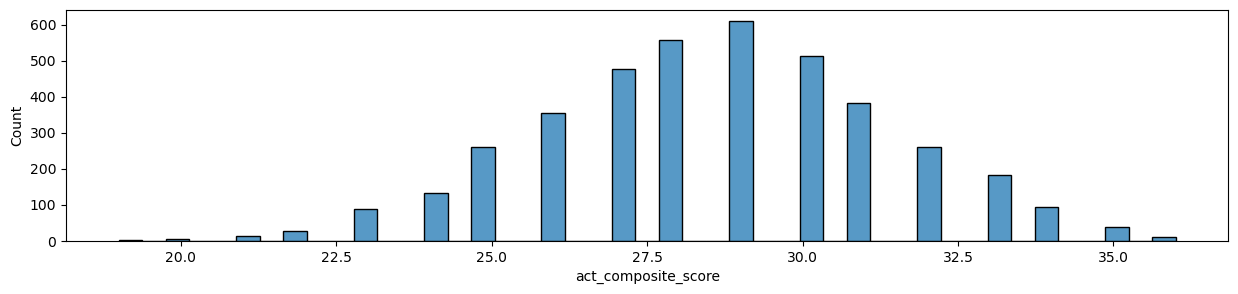

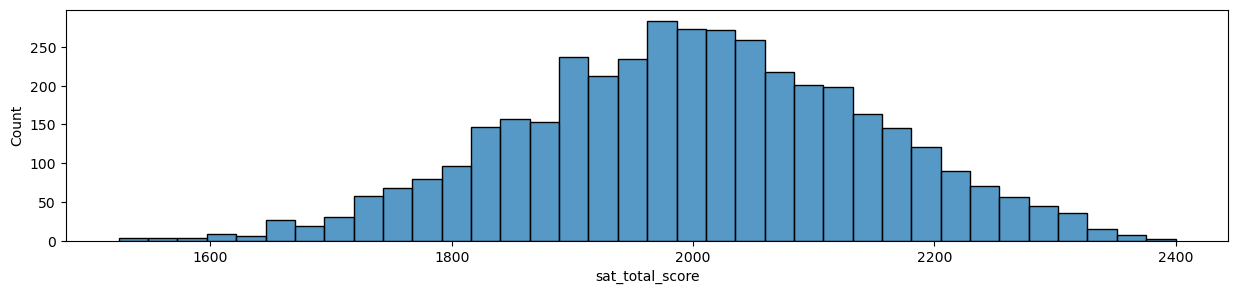

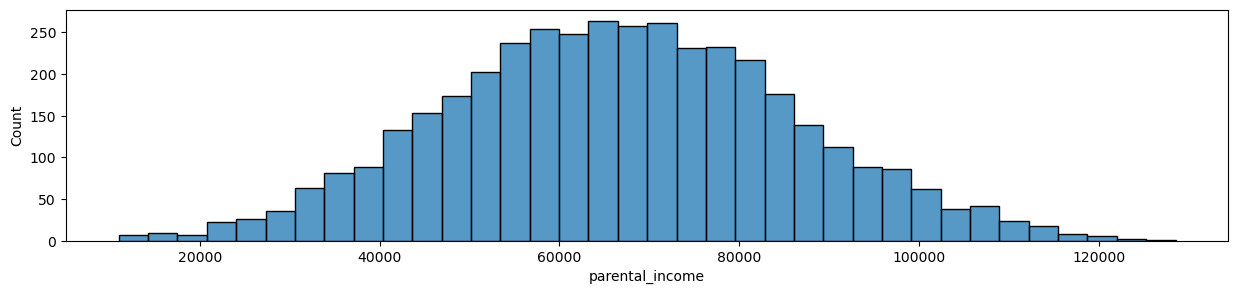

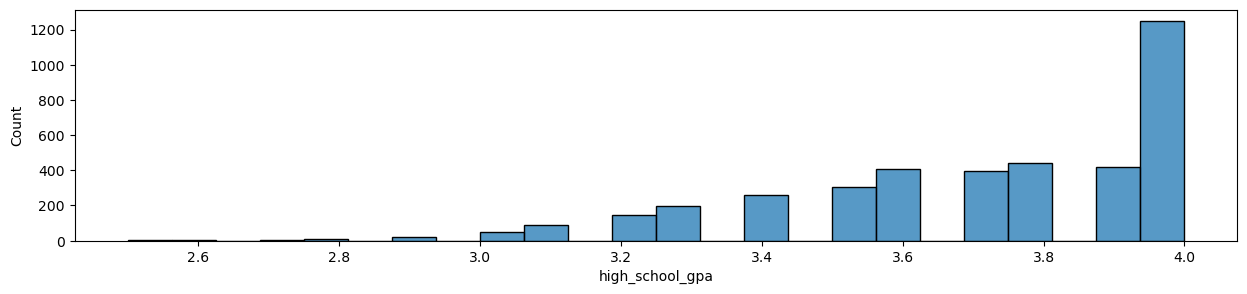

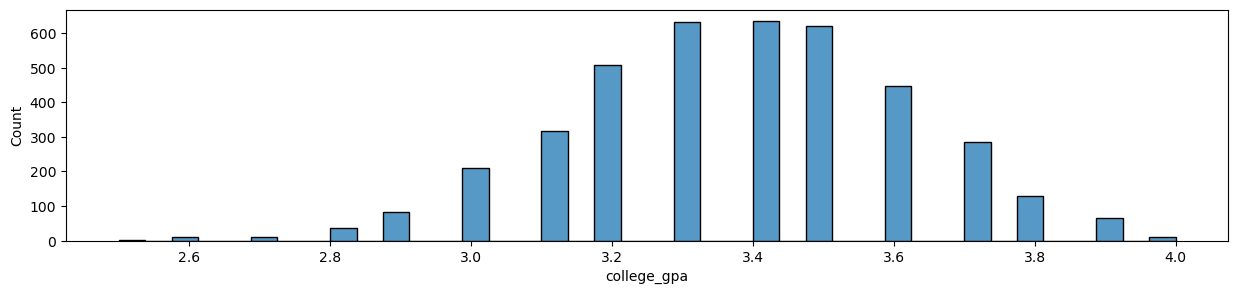

In [38]:
for column in COLS_NUMERICAL:
    plt.figure(figsize=(15,3))
    sns.histplot(data=df_full_train[COLS_NUMERICAL], x=column)

plt.show()

In [39]:
fig = px.histogram(df_full_train, 
                   x='parental_level_of_education', 
                   color='years_to_graduate', 
                   facet_col='target',
                   opacity=0.45,
                   category_orders=dict(years_to_graduate=['3', '4', '5', '6', '7', '8', '9', '10']),
                   marginal='box',
                   title="Distribution of 'parents educational level' by 'years_to_graduate' across target")
fig.show()

In [40]:
fig = px.scatter(
    df_full_train, 
    x='high_school_gpa', 
    y='college_gpa', 
    # facet_col='graduate_in_4years',
    # opacity=0.45,
    # histfunc='count', 
    title="Comparison of 'high_school_gpa' against 'college_gpa'")
fig.show()

In [41]:
# fig = px.histogram(df_full_train, 
#                    x='age_at_enrollment', 
#                    color='target', 
#                    facet_col='gender', 
#                    opacity=0.65, 
#                    title='Distribution of age groups by gender across target')
# fig.show()

### Assumptions

Looking at above scatter-plot, gonna make assumptions as follows:

- 


### Insights

Some preliminary insights:

- 
- 
  

### Questions to guide further EDA for final feature selection, model selection and final report

Following questions, moved out to its own notebook for deeper dive on EDA. 

- 

### Out-of-scope

As important as doing the needful analyis, it is also important in knowing what to exclude; in context of project's purpose and objective, time and other constraints (availability of data and possible augmenting of data)



In [42]:
data[['parental_level_of_education', 'high_school_gpa', 'years_to_graduate']] = data[['parental_level_of_education', 'high_school_gpa', 'years_to_graduate']].astype('category')

# moot point as feature is not important
# data['parental_level_of_education'] = data['parental_level_of_education'].map(EDUCATION_VALUES)


## BASELINE ML STARTS HERE

### import sklearn packages

In [43]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report



### split dataset with train_test_split

do we want 
- 2 splits for train, test or 
- 3 splits for train, val and test?

reminder: 
- not yet stratify
- not scaled
- use cross-validation 
- save final df to file as processed_df.csv?

Loading CSV data...


100%|██████████| 10/10 [00:00<00:00, 263.18it/s]

Finished processing the CSV file.
df.shape = (5000, 7)
  -- Replacing symbols in column names...
  -- Replacing symbols in data...
data.shape = (5000, 7)


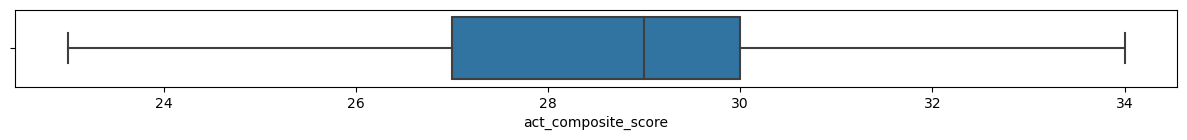

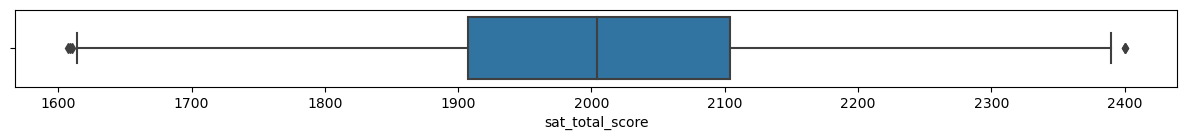

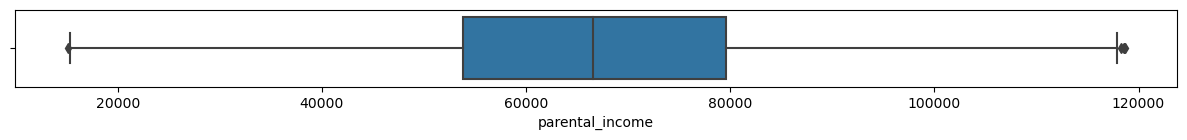

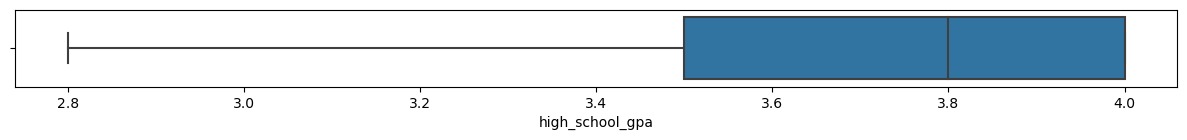

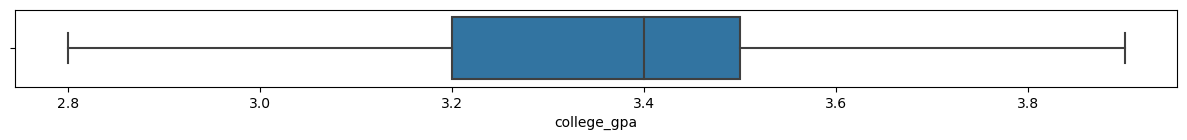

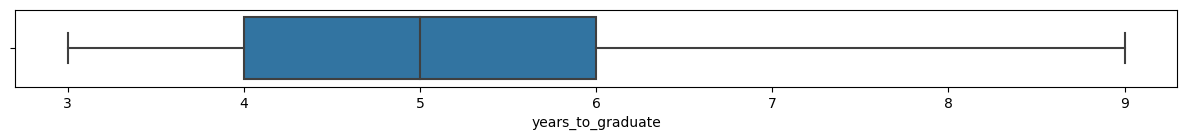

In [44]:
data = CSVDataLoader().load('data/graduation_rate.csv') 
data = Preprocessor().ColumnsSymbolReplacer(data)
data = Preprocessor().SymbolReplacer(data, 'parental_level_of_education')

print(f'{data.shape = }')
for column in numericals.columns.to_list():
    plt.figure(figsize=(15,1))
    sns.boxplot(data=numericals, x=column)

plt.show()

In [47]:
numericals = data.select_dtypes(include=['int64','float64'])
print(f'{numericals.columns = } ')

numericals.columns = Index(['act_composite_score', 'sat_total_score', 'parental_income',
       'high_school_gpa', 'college_gpa', 'years_to_graduate'],
      dtype='object') 


In [50]:
data[numericals.columns] = Preprocessor().OutliersTransformer(numericals, 0.05, 0.95) # need to be done before TargetEncoder(), that drop columns
data = FeatureBuilder().TargetEncoder(data)

  -- Transforming outliers...
  -- Creating 'target' column...


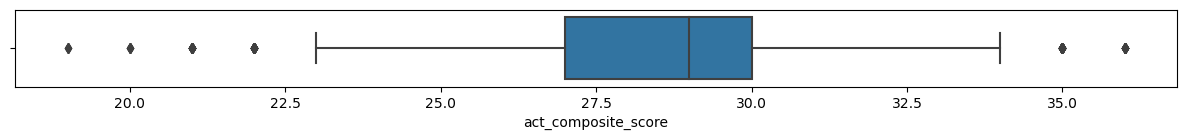

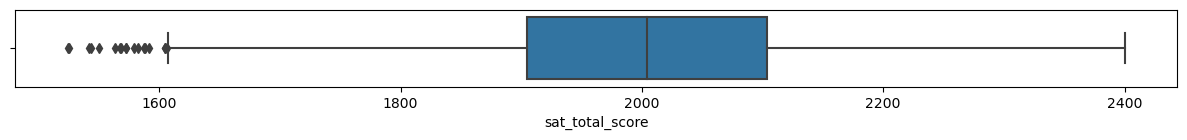

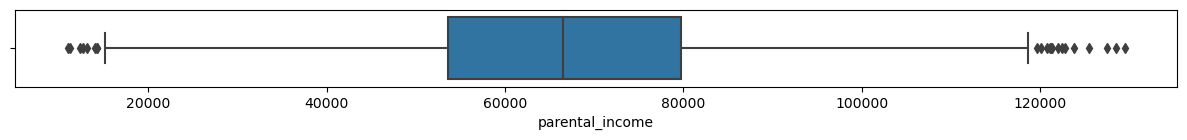

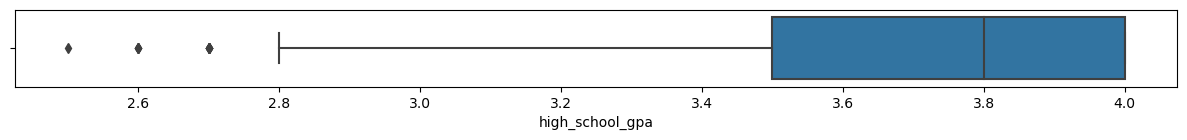

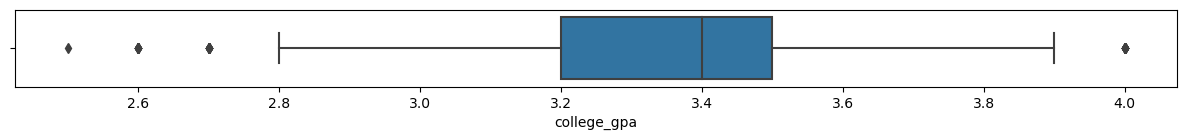

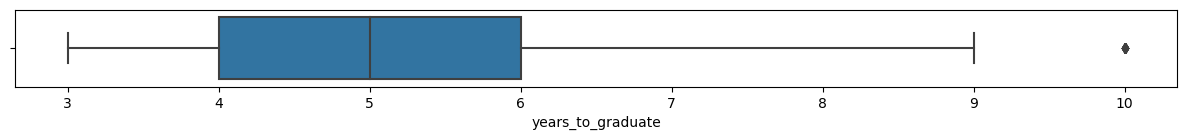

In [51]:
for column in numericals.columns.to_list():
    plt.figure(figsize=(15,1))
    sns.boxplot(data=numericals, x=column)

plt.show()

In [52]:
data.head(2).T

,0,1
act_composite_score,30.0,31.0
sat_total_score,2082.0,2145.0
parental_level_of_education,associates degree,associates degree
parental_income,82014.0,59761.0
high_school_gpa,4.0,4.0
college_gpa,3.2,3.3
target,1,1


In [53]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [54]:
df_full_train

,act_composite_score,sat_total_score,parental_level_of_education,parental_income,high_school_gpa,college_gpa,target
4982,29.0,2033.0,some college,62244.0,3.8,3.4,1
1334,25.0,1730.0,some high school,40157.0,3.1,2.9,0
1472,24.0,1816.0,some high school,25589.0,3.3,3.1,0
1605,30.0,2088.0,some college,48795.0,4.0,3.1,0
1734,33.0,2175.0,high school,44206.0,4.0,3.4,1
...,...,...,...,...,...,...,...
332,26.0,1814.0,some college,62849.0,3.3,3.0,0
1293,29.0,2054.0,masters degree,120077.0,3.9,3.8,1
4023,30.0,2054.0,associates degree,77957.0,4.0,3.4,1
3775,27.0,1958.0,associates degree,80695.0,3.7,3.4,1


In [55]:
y_train = df_train.target.values
y_val = df_val.target.values
y_test = df_test.target.values
# print(len(y_train), len(y_val), len(y_test))
print(y_train.shape, y_val.shape, y_test.shape)
print(y_train[:5])

(3000,) (1000,) (1000,)
[0 0 1 1 1]


In [56]:
df_train = df_train.drop(['target'], axis=1).reset_index(drop=True)
df_val = df_val.drop(['target'], axis=1).reset_index(drop=True)
df_test = df_test.drop(['target'], axis=1).reset_index(drop=True)
# print(len(df_train), len(df_val), len(df_test))
print(df_train.shape, df_val.shape, df_test.shape)

(3000, 6) (1000, 6) (1000, 6)


#### confirming `df_train` for initial code

> [!IMPORTANT] 
> 
> Needs to show full 6 features

In [57]:
df_train.sample(4)

,act_composite_score,sat_total_score,parental_level_of_education,parental_income,high_school_gpa,college_gpa
1554,25.0,1747.0,some high school,18803.0,3.2,2.7
1506,32.0,2159.0,associates degree,36932.0,4.0,3.3
104,28.0,2002.0,associates degree,65519.0,3.7,3.2
109,27.0,1842.0,high school,66215.0,3.5,3.4


In [58]:
train_dicts = df_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

test_dicts = df_test.to_dict(orient='records')
X_test = dv.transform(val_dicts)

### LogisticRegression

In [59]:
scores = []

In [60]:
model = LogisticRegression()
# train
model.fit(X_train, y_train)
# predict
y_train_pred, y_val_pred = Trainer().predict(model, X_train, X_val)


In [61]:
scores.append({
            "model": "LogisticRegression()", 
            "train auc": roc_auc_score(y_train, y_train_pred).round(4),
            "val auc": roc_auc_score(y_val, y_val_pred).round(4),
            "accuracy": accuracy_score(y_val, y_val_pred).round(4),
            "precision": precision_score(y_val, y_val_pred).round(4),
            "f1_mean": f1_score(y_val, y_val_pred).round(4),
            "recall": recall_score(y_val, y_val_pred).round(4),
        }
)

### DecisionTreeClassifier

In [62]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# predict
y_train_pred, y_val_pred = Trainer().predict(model, X_train, X_val)

In [63]:
scores.append({
            "model": "DecisionTreeClassifier()", 
            "train auc": roc_auc_score(y_train, y_train_pred).round(4),
            "val auc": roc_auc_score(y_val, y_val_pred).round(4),
            "accuracy": accuracy_score(y_val, y_val_pred).round(4),
            "precision": precision_score(y_val, y_val_pred).round(4),
            "f1_mean": f1_score(y_val, y_val_pred).round(4),
            "recall": recall_score(y_val, y_val_pred).round(4),
        }
)

In [64]:
from sklearn.tree import export_text
# print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

### RandomForestClassifier

In [65]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

# predict
y_train_pred, y_val_pred = Trainer().predict(model, X_train, X_val)

# compile scores
scores.append({
            "model": "RandomForestClassifier()", 
            "train auc": roc_auc_score(y_train, y_train_pred).round(4),
            "val auc": roc_auc_score(y_val, y_val_pred).round(4),
            "accuracy": accuracy_score(y_val, y_val_pred).round(4),
            "precision": precision_score(y_val, y_val_pred).round(4),
            "f1_mean": f1_score(y_val, y_val_pred).round(4),
            "recall": recall_score(y_val, y_val_pred).round(4),
        }
)

### GradientBoostingClassifier

In [66]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# predict
y_train_pred, y_val_pred = Trainer().predict(model, X_train, X_val)

# compile scores
scores.append({
            "model": "GradientBoostingClassifier()", 
            "train auc": roc_auc_score(y_train, y_train_pred).round(4),
            "val auc": roc_auc_score(y_val, y_val_pred).round(4),
            "accuracy": accuracy_score(y_val, y_val_pred).round(4),
            "precision": precision_score(y_val, y_val_pred).round(4),
            "f1_mean": f1_score(y_val, y_val_pred).round(4),
            "recall": recall_score(y_val, y_val_pred).round(4),
        }
)

### HistGradientBoostingClassifier

In [67]:
model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)

# predict
y_train_pred, y_val_pred = Trainer().predict(model, X_train, X_val)

# compile scores
scores.append({
            "model": "HistGradientBoostingClassifier()", 
            "train auc": roc_auc_score(y_train, y_train_pred).round(4),
            "val auc": roc_auc_score(y_val, y_val_pred).round(4),
            "accuracy": accuracy_score(y_val, y_val_pred).round(4),
            "precision": precision_score(y_val, y_val_pred).round(4),
            "f1_mean": f1_score(y_val, y_val_pred).round(4),
            "recall": recall_score(y_val, y_val_pred).round(4),
        }
)

### xgboost

In [68]:
# features = dv.feature_names_
# dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
# dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
model = XGBClassifier()
model.fit(X_train, y_train)

# predict
y_train_pred, y_val_pred = Trainer().predict(model, X_train, X_val)

In [69]:
# xgb_params = {
#     'eta': 0.3, 
#     'max_depth': 6,
#     'min_child_weight': 1,
    
#     'objective': 'binary:logistic',
#     'nthread': 8,
    
#     'seed': 1,
#     'verbosity': 1,
# }

# xgb = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [70]:
scores.append({
            "model": "XGBClassifier()", 
            "train auc": roc_auc_score(y_train, y_train_pred).round(4),
            "val auc": roc_auc_score(y_val, y_val_pred).round(4),
            "accuracy": accuracy_score(y_val, y_val_pred).round(4),
            "precision": precision_score(y_val, y_val_pred).round(4),
            "f1_mean": f1_score(y_val, y_val_pred).round(4),
            "recall": recall_score(y_val, y_val_pred).round(4),
        }
)

### catboost

In [71]:
# cat_columns = list(df_full_train.select_dtypes(exclude=['int64','float64']).columns)

model = CatBoostClassifier(random_seed=42)

model.fit(X_train, y_train, verbose=False) # cat_features=cat_columns,

# predict
y_train_pred, y_val_pred = Trainer().predict(model, X_train, X_val)

In [72]:
scores.append({
            "model": "CatBoostClassifier()", 
            "train auc": roc_auc_score(y_train, y_train_pred).round(4),
            "val auc": roc_auc_score(y_val, y_val_pred).round(4),
            "accuracy": accuracy_score(y_val, y_val_pred).round(4),
            "precision": precision_score(y_val, y_val_pred).round(4),
            "f1_mean": f1_score(y_val, y_val_pred).round(4),
            "recall": recall_score(y_val, y_val_pred).round(4),
        }
)

#### sample for docker prep



### model evaluation

In [73]:
print(f"Scores comparison, baseline estimators with all defaults, no scaling of data, no outliers treatment")
base_scores_df = pd.DataFrame(scores).sort_values(by='val auc', ascending=False)
base_scores_df

Scores comparison, baseline estimators with all defaults, no scaling of data, no outliers treatment


,model,train auc,val auc,accuracy,precision,f1_mean,recall
6,CatBoostClassifier(),0.6914,0.5967,0.739,0.7444,0.8364,0.9542
4,HistGradientBoostingClassifier(),0.7556,0.5962,0.725,0.7459,0.8238,0.9199
5,XGBClassifier(),0.8796,0.5947,0.711,0.7470,0.8110,0.8870
3,GradientBoostingClassifier(),0.6279,0.5932,0.738,0.7425,0.8362,0.9571
2,RandomForestClassifier(),1.0000,0.5812,0.712,0.7387,0.8154,0.9099
1,DecisionTreeClassifier(),1.0000,0.5772,0.647,0.7450,0.7488,0.7525
0,LogisticRegression(),0.5000,0.5000,0.699,0.6990,0.8228,1.0000


In [74]:
output_file = Path('baseline_scores.csv')
print(output_file)
if output_file.exists():
   print(f'{output_file} exists, not overwritten.')
else:
   base_scores_df.to_csv(output_file, index=False, header=True, mode='w')

baseline_scores.csv
baseline_scores.csv exists, not overwritten.


Insights of full-featured model:

- the tree-based models are overfitting, looking at the TRAIN scores = 1.0, because in using defaults, the `max_depth` and `early_stopping_rounds` were not specified
- Logistic Regression performs the **worst** out of all listed models 
- Gradient Boosting Classifier performs the **best** out of all listed models 

### looping

In [75]:
features = ['parental_income', 'sat_total_score', 'college_gpa'] 

In [76]:
df_train = df_train[features].reset_index(drop=True)
df_val = df_val[features].reset_index(drop=True)
df_test = df_test[features].reset_index(drop=True)

In [77]:
# no need for DictVectorizer for 3 features, all numericals
# train_dicts = df_train.to_dict(orient='records')

# dv = DictVectorizer(sparse=False)
# X_train = dv.fit_transform(train_dicts)

# val_dicts = df_val.to_dict(orient='records')
# X_val = dv.transform(val_dicts)

# test_dicts = df_test.to_dict(orient='records')
# X_test = dv.transform(val_dicts)

### classifiers

In [78]:
# Create the nested dict of dicts
classifiers = {
    'logistic': {
        'estimator': LogisticRegression(),
        'params': {
            'warm_start': [True],
            'n_jobs': [-1],
            'penalty': PENALTY,
            'C': C,
            'solver': SOLVER,
            'max_iter': MAX_ITER,
        }
    },      
    'logisticCV': {
        'estimator': LogisticRegressionCV(),
        'params': {
            'random_state': RANDOM_STATE,
            'n_jobs': [-1],
            'penalty': PENALTY,
            'Cs': Cs,
            'cv': CV,
            'solver': SOLVER,
            'max_iter': MAX_ITER,
            'class_weight':WEIGHTS
        },  
    }, 
    'decision_tree': {
        'estimator': DecisionTreeClassifier(),
        'params': {
            'random_state': RANDOM_STATE,
            'criterion': CRITERION,
            'splitter':['best', 'random'],
            'max_depth': MAX_DEPTH,
            'min_samples_split': MIN_SAMPLES_SPLIT,        
            'min_samples_leaf': MIN_SAMPLES_LEAF,
            'max_features': [None, 'auto', 'sqrt', 'log2'],
            'class_weight': WEIGHTS
        },                        
    },               
    'random_forest': {
        'estimator': RandomForestClassifier(),
        'params': {
            'random_state': RANDOM_STATE,
            'n_jobs': [-1],
            'warm_start': [True], 
            'n_estimators': N_ESTIMATORS,
            'criterion': CRITERION,
            'max_depth': MAX_DEPTH,
            'max_features': MAX_FEATURES,
            'min_samples_split': MIN_SAMPLES_SPLIT,        
            'min_samples_leaf': MIN_SAMPLES_LEAF,
            'class_weight': WEIGHTS 
        },
    },
    'grad_boost': {
        'estimator': GradientBoostingClassifier(),
        'params': {
            'random_state': RANDOM_STATE,
            'warm_start': [True],
            'loss': ['log_loss', 'exponential'],
            'learning_rate':LEARNING_RATE,
            'n_estimators': N_ESTIMATORS,
            'subsample':[0.6, 0.7, 0.75, 0.8, 0.85, 0.9],
            'criterion':['squared_error', 'friedman_mse'],
            'max_depth': MAX_DEPTH,
            'max_features': MAX_FEATURES,
            'min_samples_split': MIN_SAMPLES_SPLIT,        
            'min_samples_leaf': MIN_SAMPLES_LEAF 
        }
    }, 
    'histgrad_boost': {
        'estimator': HistGradientBoostingClassifier(),
        'params': {
            'random_state': RANDOM_STATE,
            'warm_start': [True],
            'loss': ['log_loss', 'exponential'],
            'learning_rate':LEARNING_RATE,
            'n_estimators': N_ESTIMATORS,
            'subsample':[0.6, 0.7, 0.75, 0.8, 0.85, 0.9],
            'criterion':['squared_error', 'friedman_mse'],
            'max_depth': MAX_DEPTH,
            'max_features': MAX_FEATURES,
            'min_samples_split': MIN_SAMPLES_SPLIT,        
            'min_samples_leaf': MIN_SAMPLES_LEAF 
        }
    },
    'knn': {
        'estimator': KNeighborsClassifier(),
        'params': {
            'n_jobs': [-1],
            'n_neighbors': MIN_SAMPLES_SPLIT,
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
        }            
    }, 
    'xgboost': {
        'estimator': XGBClassifier(
            eta=0.05, 
            max_depth=6,
            min_child_weight=1,
            
            objective='binary:logistic',
            eval_metric='auc',

            nthread=8,
            seed=42,
            verbosity=1
    ),
        'params': {
            'seed': RANDOM_SEED,
            'objective': ['binary:logistic'],
            'nthread': [8],
            'eval_metric': ['auc'],        
            'eta':LEARNING_RATE,
            'max_depth': MAX_DEPTH,
            'n_estimators': N_ESTIMATORS,
            'min_child_weight': MIN_SAMPLES_LEAF 
        }
    },                 
    'catboost': {
        'estimator': CatBoostClassifier(verbose=False),
        'params': {
            'random_seed': RANDOM_SEED,
            'depth': MAX_DEPTH,
            'learning_rate': LEARNING_RATE,
            'iterations': N_ESTIMATORS,
            'class_weights': WEIGHTS 
        }
    } 
}

### looping - 3 features

In [79]:
estimators = []
scores_loop = []

for classifier in classifiers:
  estimator = classifiers[classifier]['estimator']
  estimators.append(estimator)
  
# print(estimators)

In [80]:
# Train and predict each classifier in the pipeline
for classifier in estimators:
    # print(f"TRAIN loop: {classifier}")
    # train
    model = classifier
    model.fit(df_train, y_train)

    # predict
    y_train_pred, y_val_pred = Trainer().predict(model, df_train, df_val)

    # evaluate
    scores_loop.append(
        {
            "model": classifier,
            "train auc": roc_auc_score(y_train, y_train_pred).round(4),
            "val auc": roc_auc_score(y_val, y_val_pred).round(4),
            "accuracy": accuracy_score(y_val, y_val_pred).round(4),
            "precision": precision_score(y_val, y_val_pred).round(4),
            "f1_mean": f1_score(y_val, y_val_pred).round(4),
            "recall": recall_score(y_val, y_val_pred).round(4),
        }
    )

#### confirming `df_train` for looping code

> [!IMPORTANT] 
> Needs to show 3 features

In [81]:
df_train.sample(4)

,parental_income,sat_total_score,college_gpa
534,75022.0,2065.0,3.5
1052,74076.0,2082.0,3.5
2983,85841.0,1836.0,3.2
1905,61177.0,2032.0,3.3


In [82]:
print(f"Looping code. Scores comparison, baseline estimators with all defaults, no scaling of data, no outliers treatment")

# scores_loop_df = pd.DataFrame(scores_loop).sort_values(by='val auc', ascending=False)
# scores_loop_df

Looping code. Scores comparison, baseline estimators with all defaults, no scaling of data, no outliers treatment


In [83]:

scores_file = Path('baseline_loop_scores.csv')
if scores_file.exists():
    print(f'{scores_file} exists, not overwritten.')
    scores_loop_df = pd.read_csv(scores_file)
else:
    scores_loop_df = pd.DataFrame(scores_loop).sort_values(by='val auc', ascending=False)
    scores_loop_df.to_csv(scores_file, index=False, header=True, mode='w')


baseline_loop_scores.csv exists, not overwritten.


In [84]:
scores_df = pd.read_csv('baseline_scores.csv')
print(f'BASELINE SCORES')
display(scores_df)

scores_loop_df = pd.read_csv('baseline_scores.csv')
print(f'BASELINE SCORES from looping code')
display(scores_loop_df)

BASELINE SCORES


,model,train auc,val auc,accuracy,precision,f1_mean,recall
0,CatBoostClassifier(),0.6914,0.5967,0.739,0.7444,0.8364,0.9542
1,HistGradientBoostingClassifier(),0.7556,0.5962,0.725,0.7459,0.8238,0.9199
2,XGBClassifier(),0.8796,0.5947,0.711,0.7470,0.8110,0.8870
3,GradientBoostingClassifier(),0.6279,0.5924,0.737,0.7422,0.8355,0.9557
4,RandomForestClassifier(),1.0000,0.5876,0.717,0.7419,0.8185,0.9127
5,DecisionTreeClassifier(),1.0000,0.5742,0.644,0.7433,0.7464,0.7496
6,LogisticRegression(),0.5000,0.5000,0.699,0.6990,0.8228,1.0000


BASELINE SCORES from looping code


,model,train auc,val auc,accuracy,precision,f1_mean,recall
0,CatBoostClassifier(),0.6914,0.5967,0.739,0.7444,0.8364,0.9542
1,HistGradientBoostingClassifier(),0.7556,0.5962,0.725,0.7459,0.8238,0.9199
2,XGBClassifier(),0.8796,0.5947,0.711,0.7470,0.8110,0.8870
3,GradientBoostingClassifier(),0.6279,0.5924,0.737,0.7422,0.8355,0.9557
4,RandomForestClassifier(),1.0000,0.5876,0.717,0.7419,0.8185,0.9127
5,DecisionTreeClassifier(),1.0000,0.5742,0.644,0.7433,0.7464,0.7496
6,LogisticRegression(),0.5000,0.5000,0.699,0.6990,0.8228,1.0000


Insights of 3 features model:

- the tree-based models are overfitting, looking at the TRAIN scores = 1.0, because in using defaults, the `max_depth` and `early_stopping_rounds` were not specified
- Logistic Regression performs the **worst** out of all listed models 
- Gradient Boosting Classifier performs the **best** out of all listed models 

Now that we've worked on a script to loop through our models, we can work on 

1. tuning the parameters,
1. introduce pipelines to 
   - treating the outliers,
   - scaling the data, because income and gpa are on extremely different scales
   - ~~drop columns that has high correlation or mutual info scores~~

## Hyperparameters Tuning

this will be carried out in a [separate notebook](/notebook_model_tuning.ipynb)